## Data mining

We can read `spectra_0.csv`, `spectra_1.csv`, `spectra_2.csv`, `spectra_3.csv` which will be used to train a model of machine learning in order to predict either a concentration of molecule or a molecule type.

In [1]:
import pandas
import numpy

s0 = pandas.read_csv('data/spectra_0.csv')
c0 = s0['concentration']
m0 = s0['molecule']
s0 = s0['spectra']
x = []
for spec in s0:
    x.append(numpy.fromstring(spec[1:-1], sep=','))
s0 = pandas.DataFrame(x)

s1 = pandas.read_csv('data/spectra_1.csv')
c1 = s1['concentration']
m1 = s1['molecule']
s1 = s1['spectra']
x = []
for spec in s1:
    x.append(numpy.fromstring(spec[1:-1], sep=','))
s1 = pandas.DataFrame(x)

s2 = pandas.read_csv('data/spectra_2.csv')
c2 = s2['concentration']
m2 = s2['molecule']
s2 = s2['spectra']
x = []
for spec in s2:
    x.append(numpy.fromstring(spec[1:-1], sep=','))
s2 = pandas.DataFrame(x)

s3 = pandas.read_csv('data/spectra_3.csv')
c3 = s3['concentration']
m3 = s3['molecule']
s3 = s3['spectra']
x = []
for spec in s3:
    x.append(numpy.fromstring(spec[1:-1], sep=','))
s3 = pandas.DataFrame(x)

f = pandas.read_csv('data/freq.csv')

stot = pandas.concat([s0, s1, s2, s3])
c = pandas.concat([c0, c1, c2, c3])
m = pandas.concat([m0, m1, m2, m3])

In [2]:
f.head()

,freqs
0,400.095
1,402.626
2,405.155
3,407.684
4,410.212


In [3]:
c.head()

0     8000
1      500
2     2000
3     2000
4    10000
Name: concentration, dtype: int64

In [4]:
m.head()

0    Q
1    B
2    B
3    A
4    B
Name: molecule, dtype: object

In [5]:
stot.head()

,0,1,2,3,4,5,6,7,8,9,...,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865
0,0.015296,0.015294,0.015314,0.015410,0.015515,0.015557,0.015596,0.015465,0.015412,0.015336,...,0.017235,0.017241,0.017283,0.017406,0.017257,0.016999,0.017432,0.017305,0.017071,0.017202
1,0.014363,0.014329,0.014400,0.014516,0.014411,0.014418,0.014398,0.014507,0.014256,0.014644,...,0.018721,0.018701,0.018726,0.018717,0.018678,0.018617,0.018576,0.018519,0.018610,0.018763
2,0.016303,0.016185,0.016357,0.016412,0.016421,0.016429,0.016060,0.016364,0.016401,0.016364,...,0.018101,0.017998,0.017736,0.017953,0.018016,0.017647,0.018027,0.017772,0.017903,0.017600
3,0.013583,0.013554,0.013444,0.013642,0.013708,0.013579,0.013585,0.013611,0.013499,0.013731,...,0.018503,0.018131,0.017991,0.018122,0.018349,0.018125,0.018055,0.018112,0.018152,0.017960
4,0.020811,0.020767,0.020867,0.020702,0.020887,0.020445,0.020726,0.020622,0.020779,0.020920,...,0.015134,0.015288,0.015184,0.015056,0.015228,0.015286,0.015042,0.014958,0.015062,0.014867


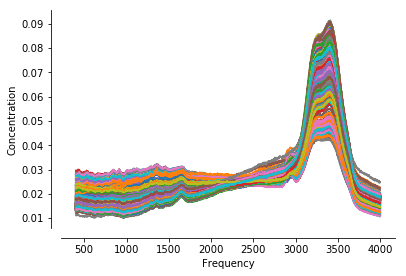

In [6]:
from matplotlib import pyplot
%matplotlib inline

fig, ax = pyplot.subplots()
ax.plot(f, stot.T)
ax.set_xlabel('Frequency')
ax.set_ylabel('Concentration')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

In [7]:
numpy.unique(m)

array(['A', 'B', 'Q', 'R'], dtype=object)

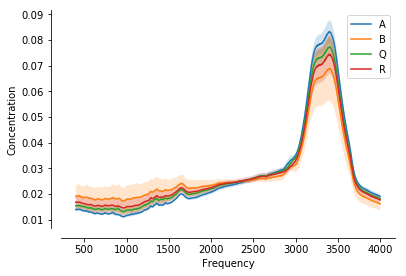

In [8]:
fig, ax = pyplot.subplots()
for m_type in numpy.unique(m):
    i = numpy.nonzero(m == m_type)[0]
    ax.plot(f, numpy.mean(stot.iloc[i], axis=0), label=m_type)
    ax.fill_between(numpy.ravel(f), numpy.mean(stot.iloc[i], axis=0) + numpy.std(stot.iloc[i], axis=0), numpy.mean(stot.iloc[i], axis=0) - numpy.std(stot.iloc[i], axis=0), alpha=0.2)

ax.set_xlabel('Frequency')
ax.set_ylabel('Concentration')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

In [9]:
numpy.unique(c)

array([  300,   400,   500,   600,   800,  1000,  1200,  1400,  1500,
        1600,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000, 20000, 25000])

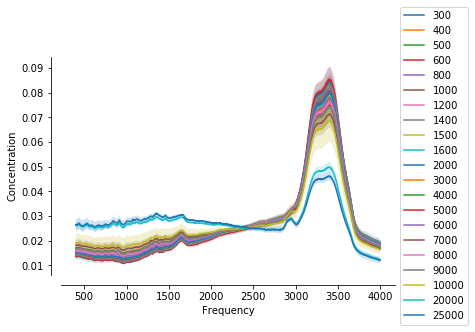

In [10]:
fig, ax = pyplot.subplots()
for c_type in numpy.unique(c):
    i = numpy.nonzero(c == c_type)[0]
    ax.plot(f, numpy.mean(stot.iloc[i], axis=0), label=c_type)
    ax.fill_between(numpy.ravel(f), numpy.mean(stot.iloc[i], axis=0) + numpy.std(stot.iloc[i], axis=0), numpy.mean(stot.iloc[i], axis=0) - numpy.std(stot.iloc[i], axis=0), alpha=0.2)

ax.set_xlabel('Frequency')
ax.set_ylabel('Concentration')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

We are going to use `spectra_4.csv` for testing a model learned on the previous data

In [11]:
s4 = pandas.read_csv('data/spectra_4.csv')

f = pandas.read_csv('data/freq.csv')

c4 = s4['concentration']
m4 = s4['molecule']
s4 = s4['spectra']

In [12]:
x = []
for spec in s4:
    x.append(numpy.fromstring(spec[1:-1], sep=','))
    
s4 = pandas.DataFrame(x)

s4.head()

,0,1,2,3,4,5,6,7,8,9,...,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865
0,0.023701,0.023571,0.023244,0.023536,0.023634,0.023371,0.023423,0.023348,0.023569,0.023189,...,0.015005,0.015258,0.014981,0.014987,0.014924,0.014803,0.015095,0.014768,0.014922,0.014848
1,0.013789,0.013528,0.013648,0.013589,0.013526,0.013707,0.013397,0.013680,0.013548,0.013673,...,0.018526,0.018771,0.018903,0.018520,0.018579,0.018642,0.018676,0.018699,0.018576,0.018567
2,0.014350,0.014415,0.014295,0.014446,0.014379,0.014427,0.014240,0.014451,0.014170,0.014463,...,0.018997,0.019242,0.019238,0.018997,0.018954,0.019171,0.019123,0.019204,0.019111,0.018844
3,0.013796,0.013415,0.013640,0.013332,0.013536,0.013525,0.013534,0.013376,0.013690,0.013631,...,0.018467,0.018868,0.018775,0.018556,0.018359,0.018654,0.018507,0.018336,0.018433,0.018598
4,0.014476,0.014386,0.014636,0.014484,0.014654,0.014414,0.014729,0.014396,0.014381,0.014636,...,0.019359,0.019328,0.019158,0.018993,0.019506,0.018934,0.019191,0.019212,0.018941,0.019093


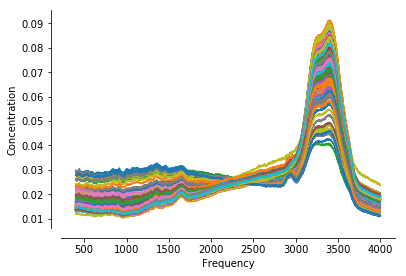

In [13]:
fig, ax = pyplot.subplots()
ax.plot(f, s4.T)
ax.set_xlabel('Frequency')
ax.set_ylabel('Concentration')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

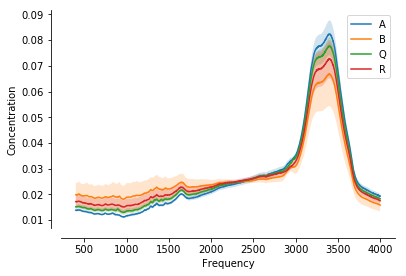

In [14]:
fig, ax = pyplot.subplots()
for m_type in numpy.unique(m4):
    i = numpy.nonzero(m4 == m_type)[0]
    ax.plot(f, numpy.mean(s4.iloc[i], axis=0), label=m_type)
    ax.fill_between(numpy.ravel(f), numpy.mean(s4.iloc[i], axis=0) + numpy.std(s4.iloc[i], axis=0), numpy.mean(s4.iloc[i], axis=0) - numpy.std(s4.iloc[i], axis=0), alpha=0.2)

ax.set_xlabel('Frequency')
ax.set_ylabel('Concentration')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

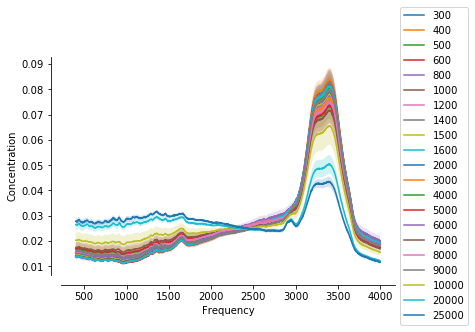

In [15]:
fig, ax = pyplot.subplots()
for c_type in numpy.unique(c4):
    i = numpy.nonzero(c4 == c_type)[0]
    ax.plot(f, numpy.mean(s4.iloc[i], axis=0), label=c_type)
    ax.fill_between(numpy.ravel(f), numpy.mean(s4.iloc[i], axis=0) + numpy.std(s4.iloc[i], axis=0), numpy.mean(s4.iloc[i], axis=0) - numpy.std(s4.iloc[i], axis=0), alpha=0.2)

ax.set_xlabel('Frequency')
ax.set_ylabel('Concentration')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

## Training and testing a machine learning model for classification

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

p = make_pipeline(StandardScaler(), PCA(n_components=100, random_state=0), RandomForestClassifier(random_state=0))
p.fit(stot, m)

print('Accuracy score: {0:.2f}'.format(p.score(s4, m4)))

Accuracy score: 0.83


[[41  3  1  0]
 [ 7 42  0  8]
 [ 3  1 44  0]
 [ 4  5  0 31]]


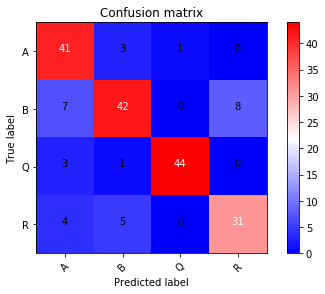

In [17]:
from sklearn.metrics import confusion_matrix
import itertools

pr = p.predict(s4)
cm = confusion_matrix(m4, pr)

print(cm)

pyplot.imshow(cm, interpolation='nearest', cmap='bwr')
pyplot.title('Confusion matrix')
pyplot.colorbar()
tick_marks = numpy.arange(len(numpy.unique(m4)))
pyplot.xticks(tick_marks, numpy.unique(m4), rotation=45)
pyplot.yticks(tick_marks, numpy.unique(m4))

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    pyplot.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

pyplot.tight_layout()
pyplot.ylabel('True label')
pyplot.xlabel('Predicted label')

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

p = make_pipeline(StandardScaler(), PCA(n_components=100, random_state=0), LinearSVC(random_state=0))
p.fit(stot, m)

print('Accuracy score: {0:.2f}'.format(p.score(s4, m4)))

Accuracy score: 0.93


[[45  0  0  0]
 [ 1 48  2  6]
 [ 2  0 46  0]
 [ 2  0  1 37]]


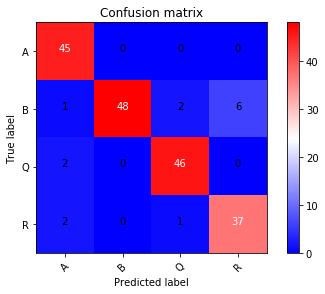

In [19]:
from sklearn.metrics import confusion_matrix
import itertools

pr = p.predict(s4)
cm = confusion_matrix(m4, pr)

print(cm)

pyplot.imshow(cm, interpolation='nearest', cmap='bwr')
pyplot.title('Confusion matrix')
pyplot.colorbar()
tick_marks = numpy.arange(len(numpy.unique(m4)))
pyplot.xticks(tick_marks, numpy.unique(m4), rotation=45)
pyplot.yticks(tick_marks, numpy.unique(m4))

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    pyplot.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

pyplot.tight_layout()
pyplot.ylabel('True label')
pyplot.xlabel('Predicted label')

## Training and testing a machine learning model for regression

In [20]:
med_stot = numpy.median(stot, axis=0)
p_25_stot = numpy.percentile(stot, 25, axis=0)
p_75_stot = numpy.percentile(stot, 75, axis=0)
stot = (stot - med_stot) / (p_75_stot - p_25_stot)
s4 = (s4 - med_stot) / (p_75_stot - p_25_stot)

In [21]:
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline

p = make_pipeline(PCA(n_components=100), RidgeCV())
p.fit(stot, c)

print('R2 score: {0:.2f}'.format(p.score(s4, c4)))

R2 score: 0.96


(0, 25000)

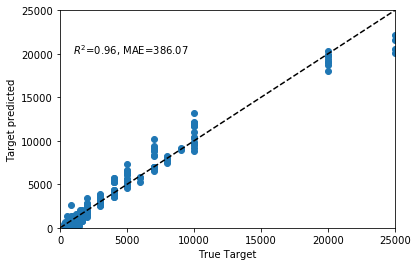

In [22]:
from sklearn.metrics import r2_score, median_absolute_error
y_pred = p.predict(s4)

fig, ax = pyplot.subplots()
ax.scatter(c4, y_pred)
ax.plot([0, 25000], [0, 25000], '--k')
ax.set_ylabel('Target predicted')
ax.set_xlabel('True Target')
ax.text(1000, 20000, r'$R^2$=%.2f, MAE=%.2f' % (
   r2_score(c4, y_pred), median_absolute_error(c4, y_pred)))
ax.set_xlim([0, 25000])
ax.set_ylim([0, 25000])

In [23]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

p = make_pipeline(PCA(n_components=100, random_state=0), RandomForestRegressor(random_state=0))
p.fit(stot, c)

print('R2 score: {0:.2f}'.format(p.score(s4, c4)))

R2 score: 0.96


(0, 25000)

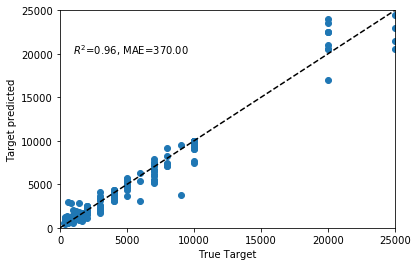

In [24]:
from sklearn.metrics import r2_score, median_absolute_error
y_pred = p.predict(s4)

fig, ax = pyplot.subplots()
ax.scatter(c4, y_pred)
ax.plot([0, 25000], [0, 25000], '--k')
ax.set_ylabel('Target predicted')
ax.set_xlabel('True Target')
ax.text(1000, 20000, r'$R^2$=%.2f, MAE=%.2f' % (
   r2_score(c4, y_pred), median_absolute_error(c4, y_pred)))
ax.set_xlim([0, 25000])
ax.set_ylim([0, 25000])